<a href="https://colab.research.google.com/github/jdariasl/ML_2020/blob/master/Labs/lab4/lab4_parte1.ipynb">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Recuerda que una vez abierto, Da clic en "Copiar en Drive", de lo contrario no podras almacenar tu progreso**

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

In [ ]:
#configuración del laboratorio
# Ejecuta esta celda!
%load_ext autoreload
%autoreload 2
#for local 
#import sys ; sys.path.append('../commons/utils/')
!wget https://raw.githubusercontent.com/jdariasl/ML_2020/master/Labs/commons/utils/general.py -O general.py --no-cache
from general import configure_lab4
configure_lab4()
from lab4 import *
GRADER = part_1()

--2020-11-06 10:59:08--  https://raw.githubusercontent.com/jdariasl/ML_2020/master/Labs/commons/utils/general.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14117 (14K) [text/plain]
Saving to: ‘general.py’

general.py          100%[===================>]  13.79K  --.-KB/s    in 0.007s  

2020-11-06 10:59:08 (1.81 MB/s) - ‘general.py’ saved [14117/14117]

lab configuration started
installing libraries
downloading files
lab configured


# Laboratorio 4 - Parte 1

Este ejercicio tiene como objetivo implementar una red neuronal artificial de tipo perceptrón multicapa (MLP) para resolver un problema de regresión. Usaremos la librería sklearn. Consulte todo lo relacionado con la definición de hiperparámetros, los métodos para el entrenamiento y la predicción de nuevas muestras en el siguiente enlace: http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

Para este ejercicio usaremos la base de datos sobre calidad del aire, que ha sido usada en laboratorios previos, pero en este caso trataremos de predecir dos variables en lugar de una, es decir, abordaremos **un problema de múltiples salidas**.

In [ ]:
#cargamos la bd que está en un archivo .data y ahora la podemos manejar de forma matricial
db = np.loadtxt('AirQuality.data',delimiter='\t')  # Assuming tab-delimiter

#Esta es la base de datos AirQuality del UCI Machine Learning Repository. En la siguiente URL se encuentra toda
#la descripción de la base de datos y la contextualización del problema.
#https://archive.ics.uci.edu/ml/datasets/Air+Quality#

x = db[:,0:11]
y = db[:,11:13]

Para calcular los errores, vamos a explorar y usar la el [modulo de metricas den sklearn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). Podemos observar que el modulo tiene metricas para regresión y clasificación.

## Ejercicio 1 - Experimentar con MLP paa regresión

Para porder implementar nuestra función, lo primero que debemos entender es la estrucutra de la red. Como mencionamos, vamos a solucionar un problema de multiples salidas. Estas salidas con valores continuos. Por lo tanto debemos garantizar que la capa de salida del nuestra red tenga la capacidad de modelar. este tipo de datos.


In [ ]:
#@title Pregunta Abierta
#@markdown ¿De acuerdo al problema planteado, que función de activación debe usar el MLP para un problema de regresión?
respuesta_1 = "Seg\xFAn el problema planteado, la funci\xF3n de activaci\xF3n que debe usar el MLP para un problema de regresi\xF3n es la IDENTITY, ya que, refiri\xE9ndonos a la documentaci\xF3n, esta nos da una funci\xF3n lineal que describe fielmente una regresi\xF3n" #@param {type:"string"}

Una caracteristica de los modelos de sklearn, es que ciertos tipos de atributos, solo pueden ser accedidos cuanto se entrena el modelo. Vamos a realizar un pequeña función para comprobar cual es la capa de activación de los modelos MLP para regresión de sklearn.

In [ ]:
# ejercicio de código
def output_activation():
    """funcion que entrena un modelo
    con data aleatoria para confirmar la funcion
    de activacion de la ultima capa
    """
    mlp= MLPRegressor()
    # fit with some random data
    xrandom = np.random.rand(10,2)
    yrandom = np.zeros(10)
    # llamar el metodo adecuado para entrenar
    # el mlp con los x y 'y' random
    mlp.fit(xrandom, yrandom)
    # retornar el atributo de mlp adecuado
    return (mlp.out_activation_)

In [ ]:
## la funcion que prueba tu implementacion
#ignora las graficas!!
GRADER.run_test("ejercicio1", output_activation)

TEST EXITOSO!


In [ ]:
print("la función de activación para un problema de regresion es:", output_activation())

la función de activación para un problema de regresion es: identity


Una vez comprobado que sklearn usa la función de activación correcta, vamos crear la función para realizar los experimentos.

Vamos completar la función con el código necesario para usar una red neuronal tipo MLP para solucionar el problema de regresión propuesto.
1. Como función de activación en las capas ocultas use la función 'tanh'. 
2. Ajuste el número máximo de épocas a 400.
3. Dejamos como variables el número de capas ocultas y el número de neuronas por capa
5. Selecciones la función adecuada del [modulo de sklearn para calcular el error absoluto medio](https://scikit-learn.org/stable/modules/classes.html?highlight=metrics#module-sklearn.metrics). Tener en cuenta que parametros usar.
6. Debemos usar los nombres explicitos, por ejemplo si para el MLP es necesario usar el parametro `activation`, debe ser llamado: `MLPRegressor(activation=...)`
7. Explorar que hace la siguiente linea de codigo `tuple(2*[100])`

In [ ]:
# ejercicio de código

def experimetar_mlp(X,Y, num_hidden_layers, num_neurons):
    """ función para realizar experimentos con el MLP
    x: matriz de numpy con caracteristicas
    y: vector numpy con las variables a predecir
    num_hidden_layers: list de enteros con el numero de capdas
        ocultas a usar
    num_neurons: list de enteros con el numero de neuronas a usar
    
    Retorna: dataframe con 6 columnas:
        - numero de capas, numero de neuronas
        - promedio de error prueba variable 1 y desviación estandar
        - promedio de error prueba variable 2 y desviación estandar
        
    """
    #Validamos el modelo
    Folds = 4
    ss = ShuffleSplit(n_splits=Folds, test_size=0.2)
    resultados = pd.DataFrame()
    idx = 0
    for hidden_layers in num_hidden_layers:
        for neurons in num_neurons:
            for j, (train, test) in enumerate(ss.split(X)):
                # para almacenar errores intermedios
                ErrorY1 = np.zeros(Folds)
                ErrorY2 = np.zeros(Folds)
                Xtrain= X[train,:]
                Ytrain = Y[train,:]
                Xtest = X[test,:]
                Ytest = Y[test,:]
                #Normalizamos los datos
                scaler = StandardScaler().fit(X= Xtrain)       
                Xtrain = scaler.transform(Xtrain)
                Xtest = scaler.transform(Xtest)
                #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
                # prestar atención a los parametros, correctos.
                hidden_layer_sizes = tuple(hidden_layers*[neurons])
                mlp = MLPRegressor( activation='tanh',max_iter = 400, hidden_layer_sizes= hidden_layer_sizes)
                # entrena el MLP
                mlp.fit(X = Xtrain, y=Ytrain)
                #Use para el modelo para hacer predicciones sobre el conjunto Xtest
                Yest = mlp.predict(Xtest)
                #Mida el error absoluto medio para cada una de las dos salidas
                #Observe bien la documentación. recordar que esta resolviendo
                # un problema de multiples salidas
                ErrorY1[j] =  mean_absolute_error(Ytest[:,0], Yest[:,0], multioutput='raw_values')
                ErrorY2[j] =  mean_absolute_error(Ytest[:,1], Yest[:,1], multioutput='raw_values')
        
            print('error para salida 1 = ' + str(np.mean(ErrorY1)) + '+-' + str(np.std(ErrorY1)))
            print('error para salida 2 = ' + str(np.mean(ErrorY2)) + '+-' + str(np.std(ErrorY2)))
        
            resultados.loc[idx,'capas ocultas'] = hidden_layers
            resultados.loc[idx,'neuronas en capas ocultas'] = neurons 
            resultados.loc[idx,'error de prueba y1(media)'] = np.mean(ErrorY1)
            resultados.loc[idx,'intervalo de confianza y1'] = np.std(ErrorY1)
            resultados.loc[idx,'error de prueba y2(media)'] = np.mean(ErrorY2)
            resultados.loc[idx,'intervalo de confianza y2'] = np.std(ErrorY2)
            idx+=1
    return (resultados)

In [ ]:
## la funcion que prueba tu implementacion
# ignorar los prints
GRADER.run_test("ejercicio2", experimetar_mlp)

error para salida 1 = 0.12917618059943078+-0.22373970792590722
error para salida 2 = 0.14044513738331144+-0.2432581136238865
error para salida 1 = 0.18715039776692924+-0.3241539975890464
error para salida 2 = 0.13155518520503837+-0.2278602647742599
error para salida 1 = 0.19421097773927162+-0.33638328083204666
error para salida 2 = 0.11371166900420915+-0.19695438812874533
error para salida 1 = 0.19407524061783932+-0.3361481772412528
error para salida 2 = 0.08389307352517324+-0.14530706574871152
TEST EXITOSO!


In [ ]:
# tarda unos minutos!!
resultados_mlpr = experimetar_mlp(x,y, [1,2], [8,12,16,20])

error para salida 1 = 2.357881850887449+-4.083971163981605
error para salida 2 = 2.915541282507901+-5.04986563286821
error para salida 1 = 1.7219422099714268+-2.982491395367947
error para salida 2 = 1.2802827302548696+-2.217514736854434
error para salida 1 = 1.2576076334987938+-2.1782403172063702
error para salida 2 = 1.252348856795689+-2.1691318487709337
error para salida 1 = 1.061038553353499+-1.837772683197641
error para salida 2 = 0.6261206456959342+-1.0844727700131895
error para salida 1 = 2.097892528421766+-3.633656448045634
error para salida 2 = 2.6240464613576573+-4.544981792492785
error para salida 1 = 1.512407101467359+-2.6195659414694443
error para salida 2 = 1.8503885565348368+-3.2049669936623735
error para salida 1 = 1.154213669678047+-1.9991567186728987
error para salida 2 = 1.1382858264827374+-1.9715688850036321
error para salida 1 = 0.8422755451289902+-1.4588640381361837
error para salida 2 = 0.5549914542804243+-0.9612733965802346


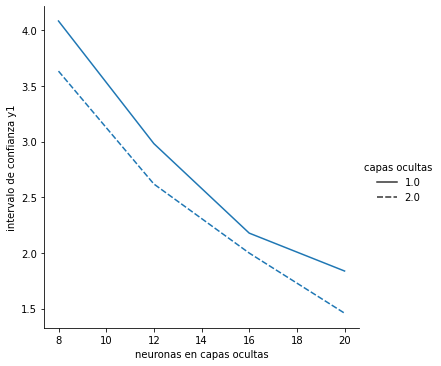

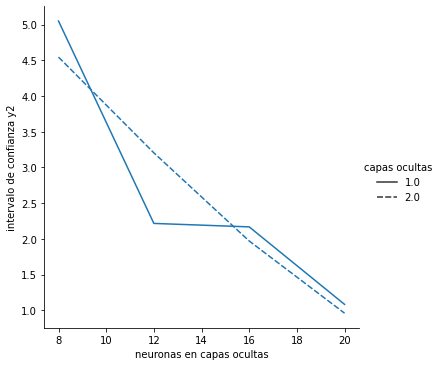

In [ ]:
# ver los resultados
import seaborn as sns
sns.relplot(data = resultados_mlpr,  x='neuronas en capas ocultas', y = 'intervalo de confianza y1', style= 'capas ocultas', kind = 'line')
sns.relplot(data = resultados_mlpr,  x='neuronas en capas ocultas', y = 'intervalo de confianza y2', style= 'capas ocultas', kind = 'line')

In [ ]:
#@title Pregunta Abierta
#@markdown  ¿como influencian los parametros de numero de capas y el numero de neuronas? explique de acuerdo a los resultados, recuerde concentrarse en los patrones no en valores especificos
respuesta_2 = "La influencia que tienen los par\xE1metros de numero de capas (desde ahora nc) y numero de neuronas (desde ahora nn), en el ejercicio, es que se puede identificar que a mayor nc, podemos encontrarnos con un modelo un poco mas estable y constante, y a mayor nn en las capas ocultas los intervalos de confianza y1 y y2 disminuyen" #@param {type:"string"}

## Ejercicio 2 Experimentar con MLP para clasificación

A continuación se leen los datos de un problema de clasificación. El problema corresponde a la clasifiación de dígitos escritos a mano. Usaremos únicamente 4 de las 10 clases disponibles. Los datos fueron preprocesados para reducir el número de características. La técnica usada será analizada más adelante en el curso.

In [ ]:
digits = load_digits(n_class=4)
#--------- preprocesamiento--------------------
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
#---------- Datos a usar ----------------------
Xd = data
Yd = digits.target

In [ ]:
#@title Pregunta Abierta
#@markdown  ¿Qué tipo de función de activación usa el modelo en la capa de salida para un problema de clasificación? 
respuesta_3 = "El tipo de funci\xF3n de activaci\xF3n que usa el modelo en la capa de salida para un problema de clasificaci\xF3n es la de LOGISTIC, porque, refiri\xE9ndonos a la documentaci\xF3n, podemos observar que este tipo de funci\xF3n de activaci\xF3n nos deja trabajar el modelo de clasificaci\xF3n con m\xFAltiples salidas" #@param {type:"string"}

como lo hicmos antes, vamos a comprobar con la libreria la función de activación

In [ ]:
# ejercicio de código
def output_activation_MPC():
    """funcion que entrena un modelo
    con data aleatoria para confirmar la funcion
    de activacion de la ultima capa
    """
    mlp = MLPClassifier()
    # fit with some random data
    xrandom = np.random.rand(10,2)
    yrandom = np.zeros(10)
    # llamar el metodo adecuado para entrenar
    # el mlp con los x y 'y' random
    mlp.fit(xrandom, yrandom )
    # retornar el atributo de mlp adecuado
    return (mlp.out_activation_)

In [ ]:
## la funcion que prueba tu implementacion
GRADER.run_test("ejercicio3", output_activation_MPC)

TEST EXITOSO!


In [ ]:
print("la función de activación para un problema de clasificación es:", output_activation_MPC())

la función de activación para un problema de clasificación es: logistic


Ahora en nuestro siguiente ejercicio vamos a implementar una red neuronal artificial de tipo perceptrón multicapa (MLP) para resolver un problema de clasificación. Usaremos la librería sklearn. Consulte todo lo relacionado con la definición de hiperparámetros, los métodos para el entrenamiento y la predicción de nuevas muestras en el siguiente enlace: http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier


Vamos completar la función con el código necesario para usar una red neuronal tipo MLP para solucionar el problema de regresión propuesto.
1. Como función de activación en las capas ocultas use la función 'tanh'. 
2. Ajuste el número máximo de épocas a 400.
3. Dejamos como variables el número de capas ocultas y el número de neuronas por capa
5. Selecciones la función adecuada del [modulo de sklearn para calcular la exactitud del clasificador](https://scikit-learn.org/stable/modules/classes.html?highlight=metrics#module-sklearn.metrics). Tener en cuenta que parametros usar.
6. Debemos usar los nombres explicitos, por ejemplo si para el MLP es necesario usar el parametro `activation`, debe ser llamado: `MLPClassifier(activation=...)`

In [ ]:
# ejercicio de código
def experimetar_mlpc(X,Y, num_hidden_layers, num_neurons):
    """ función para realizar experimentos con el MLP
    x: matriz de numpy con caracteristicas
    y: vector numpy con las variables a predecir
    num_hidden_layers: list de enteros con el numero de capdas
        ocultas a usar
    num_neurons: list de enteros con el numero de neuronas a usar
    
    Retorna: dataframe con 4 columnas:
        - numero de capas, numero de neuronas
        - promedio de error prueba (exactitud/eficiencia) de claisficacion y desviación estandar        
    """
    #Validamos el modelo
    Folds = 4
    skf = StratifiedKFold(n_splits=Folds)
    resultados = pd.DataFrame()
    idx = 0
    for hidden_layers in num_hidden_layers:
        for neurons in num_neurons:
            for j, (train, test) in enumerate(skf.split(X, Y)):
                # para almacenar errores intermedios
                Error = np.zeros(Folds)
                Xtrain= X[train,:]
                Ytrain = Y[train]
                Xtest = X[test, :]
                Ytest = Y[test]
                #Normalizamos los datos
                scaler = StandardScaler().fit(X= Xtrain)       
                Xtrain = scaler.transform(Xtrain)
                Xtest = scaler.transform(Xtest)
                #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
                # prestar atención a los parametros, correctos.
                hidden_layer_sizes = tuple(hidden_layers*[neurons])
                #print(hidden_layer_sizes)
                mlp = MLPClassifier(activation='tanh', max_iter=400,  hidden_layer_sizes = hidden_layer_sizes)
                # entrenar el MLP
                mlp.fit(X = Xtrain, y=Ytrain)
                #Use para el modelo para hacer predicciones sobre el conjunto Xtest
                Yest = mlp.predict(Xtest)
                #Mida el error absoluto medio para cada una de las dos salidas
                #Observe bien la documentación. recordar que esta resolviendo
                # un problema de multiples salidas
                Error[j] = accuracy_score(Ytest,Yest)
                
        
            print('error para configuracion de params = ' + str(np.mean(Error)) + '+-' + str(np.std(Error)))
        
            resultados.loc[idx,'capas ocultas'] = hidden_layers
            resultados.loc[idx,'neuronas en capas ocultas'] = neurons 
            resultados.loc[idx,'error de prueba(media)'] = np.mean(Error)
            resultados.loc[idx,'intervalo de confianza'] = np.std(Error)
            idx+=1
    return (resultados)

In [ ]:
## la funcion que prueba tu implementacion
GRADER.run_test("ejercicio4", experimetar_mlpc)

error para configuracion de params = 0.14285714285714285+-0.24743582965269675
error para configuracion de params = 0.07142857142857142+-0.12371791482634838
error para configuracion de params = 0.10714285714285714+-0.18557687223952254
error para configuracion de params = 0.14285714285714285+-0.24743582965269675
TEST EXITOSO!


In [ ]:
# tarda unos minutos!!
resultados_mlpc = experimetar_mlpc(Xd,Yd, [1,2], [12,16,20,24])

error para configuracion de params = 0.2263888888888889+-0.39211705782462086
error para configuracion de params = 0.23472222222222222+-0.40655081455436143
error para configuracion de params = 0.23194444444444445+-0.40173956231111463
error para configuracion de params = 0.22777777777777777+-0.3945226839462443
error para configuracion de params = 0.23472222222222222+-0.40655081455436143
error para configuracion de params = 0.23472222222222222+-0.40655081455436143
error para configuracion de params = 0.23333333333333334+-0.40414518843273806
error para configuracion de params = 0.23194444444444445+-0.40173956231111463


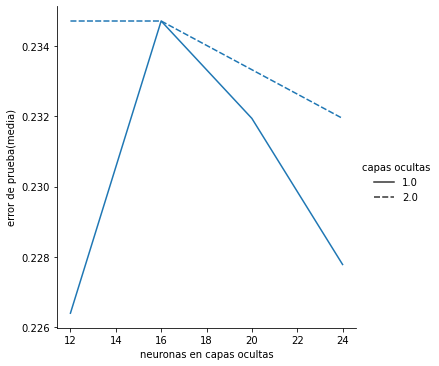

In [ ]:
# ver los resultados
import seaborn as sns
sns.relplot(data = resultados_mlpc,  x='neuronas en capas ocultas', y = 'error de prueba(media)', style= 'capas ocultas', kind = 'line')

In [ ]:
#@title Pregunta Abierta
#@markdown ¿Cuántas neuronas en la capa de salida tiene el modelo?¿Porqué debe tener ese número?
respuesta_4 = "El n\xFAmero de capas de salida que tiene el modelo es de cuatro (4) y se debe tener este numero ya que es el numero de clases del modelo" #@param {type:"string"}

**nota rapida** En la practica sklearn no es una la libreria indicada para desarollar redes neuronales, para practicas mas avanzadas y realizar modelos en el "mundo real" [se deben usar conceptos de deep learning y una libreria llamada Keras](https://colab.research.google.com/github/lexfridman/mit-deep-learning/blob/master/tutorial_deep_learning_basics/deep_learning_basics.ipynb).

In [ ]:
GRADER.check_tests()

Todo se ve ok. Asegurate de responder las preguntas abiertas y envia e archivo al formulario ¡buen trabajo!


In [ ]:
#@title Integrantes
codigo_integrante_1 ='1061805868' #@param {type:"string"}
codigo_integrante_2 = '1037652924'  #@param {type:"string"}

----
esta linea de codigo va fallar, es de uso exclusivo de los profesores


In [ ]:
GRADER.grade()

uso del docente
